  # **AIR BNB ANALYSIS**
  **Objective 1:**


*   Read in the AirBNB listings Data.
*   Cast any date columns as a datetime format.
*   Filter down the data to just listings in the city of Paris.
*   QA the paris listings data: check for missing values and calculate the minimum,maximum and average for each numeric value field.






In [8]:
import pandas as pd
listings = pd.read_csv('Listings.csv',
                       encoding='ISO-8859-1',
                       low_memory=False,
                       parse_dates=["host_since"])




In [9]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [7]:
listings["host_since"] = pd.to_datetime(listings["host_since"])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [11]:
paris_listings=(
  listings
  .query("city=='Paris'")
.loc[:,["host_since","neighbourhood","city","accommodates","price"]]
)
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [12]:
paris_listings.isna().sum()

,0
host_since,33
neighbourhood,0
city,0
accommodates,0
price,0


In [13]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [15]:
paris_listings.query("price==0 and accommodates==0").count()

,0
host_since,54
neighbourhood,54
city,54
accommodates,54
price,54


# **Objective 2: Prepare for Visualization**


*   Create the dataframe called paris_listings_neighbourhood.Group the paris lightings by neighbourhood and calculate the average price for each .Sort by price in ascending order.
*   Create the dataframe called paris_listings_acommodations.Filter your data down to the most expensive neighbourhood in the paris.Group it by accomodates and calculate the average price for each .Sort by price in ascending order.
*   Finally Create a dataframe called paris_listings_over_time.Group the data by the year component of host_since.Calculate a count of rows to get the number of new hosts for each year, and average price of listings for each year.





In [19]:
paris_listings_neighbourhood=(
    paris_listings
    .groupby("neighbourhood")
    .agg({"price":"mean"})
         .sort_values("price")

)
paris_listings_neighbourhood.tail()


,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [23]:
paris_listings_accomodates=(
    paris_listings
    .query("neighbourhood=='Elysee'")
    .groupby("accommodates")
    .agg({"price":"mean"})
    .sort_values("price")
)
paris_listings_accomodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [24]:
paris_listings_overtime=(
    paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({"neighbourhood":"count","price":"mean"})
)
paris_listings_overtime.head()

<ipython-input-24-ce3acc6e762e>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("Y")


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# **Objective 3:**

*   Build a horizontal bar chart of average rent price by neighbourhood.which neighbourhoods stand out ?

*   Build a horizontal bar chart of average price by accomodates in the most expensive neighbourhood.Are the results intiutive?
*   Finally build a line charts of new hosts per year and average price by year.What happened to new hosts in 2015? Was  average price impacted?

*   Challenge:Plot the both time series in a dual axis in line chart!



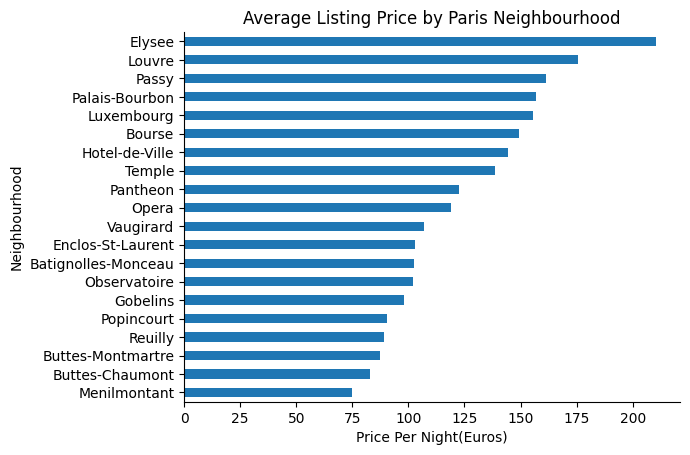

In [28]:
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listing Price by Paris Neighbourhood",
     xlabel="Price Per Night(Euros)",
     ylabel="Neighbourhood",
     legend=None
 )
 )
sns.despine()

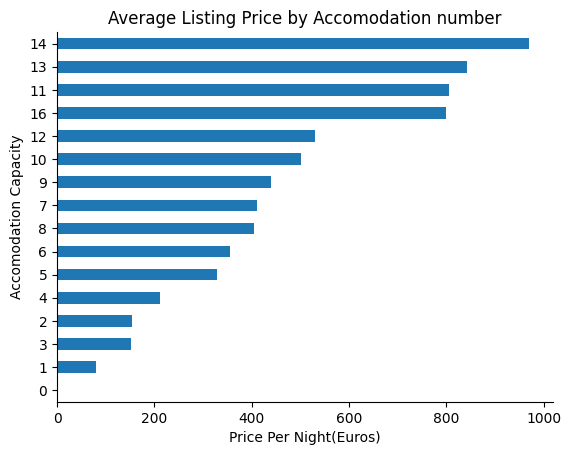

In [29]:
import seaborn as sns

(paris_listings_accomodates
 .plot
 .barh(
     title="Average Listing Price by Accomodation number",
     xlabel="Price Per Night(Euros)",
     ylabel="Accomodation Capacity",
     legend=None
 )
 )
sns.despine()

<Axes: title={'center': 'New AirBNB Hosts in Paris Over Time'}, xlabel='host_since', ylabel='New Hosts'>

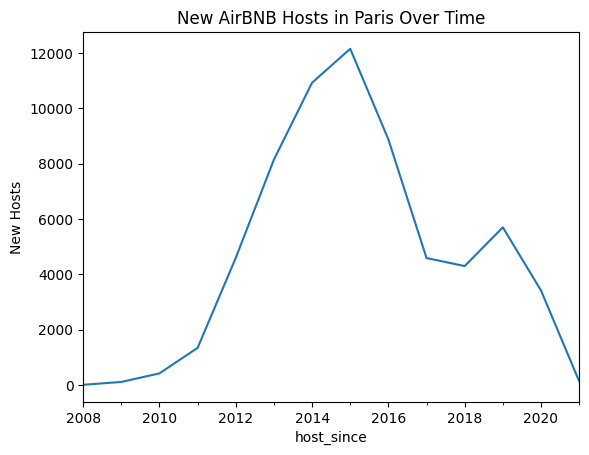

In [30]:
paris_listings_overtime['neighbourhood'].plot(
    ylabel="New Hosts",
    title="New AirBNB Hosts in Paris Over Time"
)

<Axes: title={'center': 'Average AirBNB Price in Paris Over Time'}, xlabel='host_since', ylabel='Average Price (Euros)'>

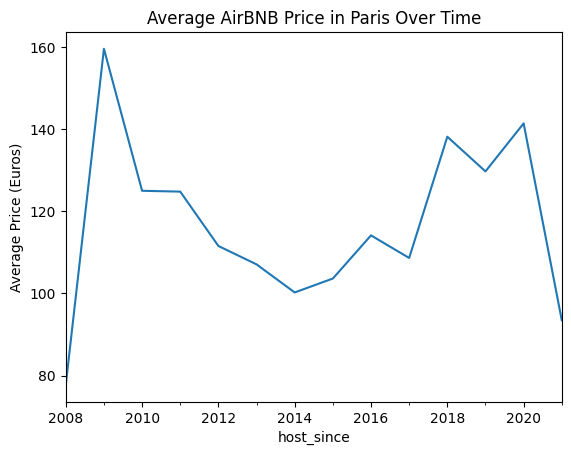

In [31]:
paris_listings_overtime['price'].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBNB Price in Paris Over Time"
)

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts ,Higher Prices')

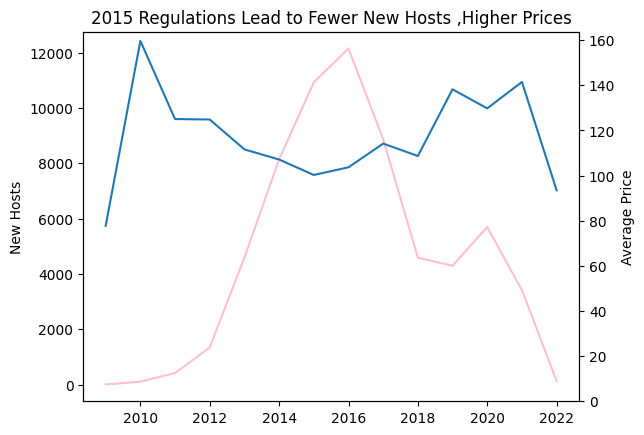

In [39]:
import matplotlib.pyplot as plt
fig ,ax =plt.subplots()
ax.plot(
    paris_listings_overtime.index,
    paris_listings_overtime['neighbourhood'],
    label="New Hosts",
    c="pink"
)
ax.set_ylabel("New Hosts")
ax2=ax.twinx()
ax2.plot(
    paris_listings_overtime.index,
    paris_listings_overtime['price'],
    label="Average Price"
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")
ax2.set_title("2015 Regulations Lead to Fewer New Hosts ,Higher Prices")
